# Soal 3: Time Series Decomposition

## Assignment CLO 2 & 3 - Sistem Cerdas IoT

**Tujuan:** Melakukan **Time Series Decomposition** untuk setiap parameter cuaca menggunakan model **Additive**.

**Komponen Dekomposisi:**
1. **Trend** - Pola pergerakan jangka panjang
2. **Seasonal** - Pola berulang dalam periode tertentu
3. **Residual** - Variasi acak yang tersisa

**Parameter yang didekomposisi:**
- TAVG (Temperatur rata-rata °C)
- RH_AVG (Kelembapan rata-rata %)
- RR (Curah hujan mm)
- FF_AVG (Kecepatan angin rata-rata m/s)

**Dataset:** Data hasil imputasi Prophet dari Soal 1

## 1. Teori Time Series Decomposition

### Model Additive vs Multiplicative

**Model Additive:** $Y_t = T_t + S_t + R_t$
- Digunakan ketika variasi musiman **konstan** sepanjang waktu
- Cocok untuk data dengan fluktuasi yang relatif stabil

**Model Multiplicative:** $Y_t = T_t \times S_t \times R_t$
- Digunakan ketika variasi musiman **proporsional** terhadap level data
- Cocok untuk data dengan fluktuasi yang meningkat seiring waktu

### Komponen:
- **Trend ($T_t$)**: Pergerakan jangka panjang (naik/turun)
- **Seasonal ($S_t$)**: Pola berulang dalam periode tetap
- **Residual ($R_t$)**: Noise/variasi acak

## 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

print("✅ Library berhasil diimport!")

✅ Library berhasil diimport!


## 3. Load Data Hasil Imputasi

In [2]:
# Load data hasil imputasi Prophet
df = pd.read_csv('DATA/2024_prophet.csv', index_col='TANGGAL', parse_dates=True)

# Parameter yang akan didekomposisi
params = ['TAVG', 'RH_AVG', 'RR', 'FF_AVG']

param_labels = {
    'TAVG': 'Temperatur Rata-rata (°C)',
    'RH_AVG': 'Kelembapan Rata-rata (%)',
    'RR': 'Curah Hujan (mm)',
    'FF_AVG': 'Kecepatan Angin Rata-rata (m/s)'
}

print("=" * 60)
print("DATA HASIL IMPUTASI PROPHET")
print("=" * 60)
print(f"Periode data: {df.index.min().strftime('%d-%m-%Y')} s.d. {df.index.max().strftime('%d-%m-%Y')}")
print(f"Jumlah data: {len(df)} hari")
print(f"\nPreview data:")
df[params].head(10)

DATA HASIL IMPUTASI PROPHET
Periode data: 04-01-2024 s.d. 31-12-2024
Jumlah data: 363 hari

Preview data:


,TAVG,RH_AVG,RR,FF_AVG
TANGGAL,,,,
2024-01-04,22.5,91.0,1.600000,0
2024-01-05,23.9,82.0,32.500000,0
2024-01-06,23.4,87.0,22.500000,0
2024-01-07,22.8,90.0,9.300000,0
2024-01-08,23.8,85.0,37.200000,0
2024-01-09,23.5,86.0,2.800000,0
2024-01-10,23.6,88.0,14.300000,0
2024-01-11,22.9,91.0,61.700000,0
2024-01-12,24.5,76.0,49.300000,0


## 4. Time Series Decomposition

Melakukan dekomposisi untuk setiap parameter cuaca menggunakan model **Additive** dengan periode **30 hari** (bulanan).

In [3]:
# Lakukan dekomposisi untuk setiap parameter
decomposition_results = {}

print("=" * 60)
print("PROSES TIME SERIES DECOMPOSITION")
print("=" * 60)

for col in params:
    print(f"📊 Memproses {col}...")
    
    # Dekomposisi dengan model additive dan period=30 (bulanan)
    decomposition = seasonal_decompose(df[col], model='additive', period=30)
    decomposition_results[col] = decomposition
    
print("\n✅ Dekomposisi selesai untuk semua parameter!")

PROSES TIME SERIES DECOMPOSITION
📊 Memproses TAVG...
📊 Memproses RH_AVG...
📊 Memproses RR...
📊 Memproses FF_AVG...

✅ Dekomposisi selesai untuk semua parameter!


## 5. Plot Dekomposisi - TAVG (Temperatur Rata-rata)

✅ Plot disimpan ke: DATA/plot_decomposition_TAVG.png


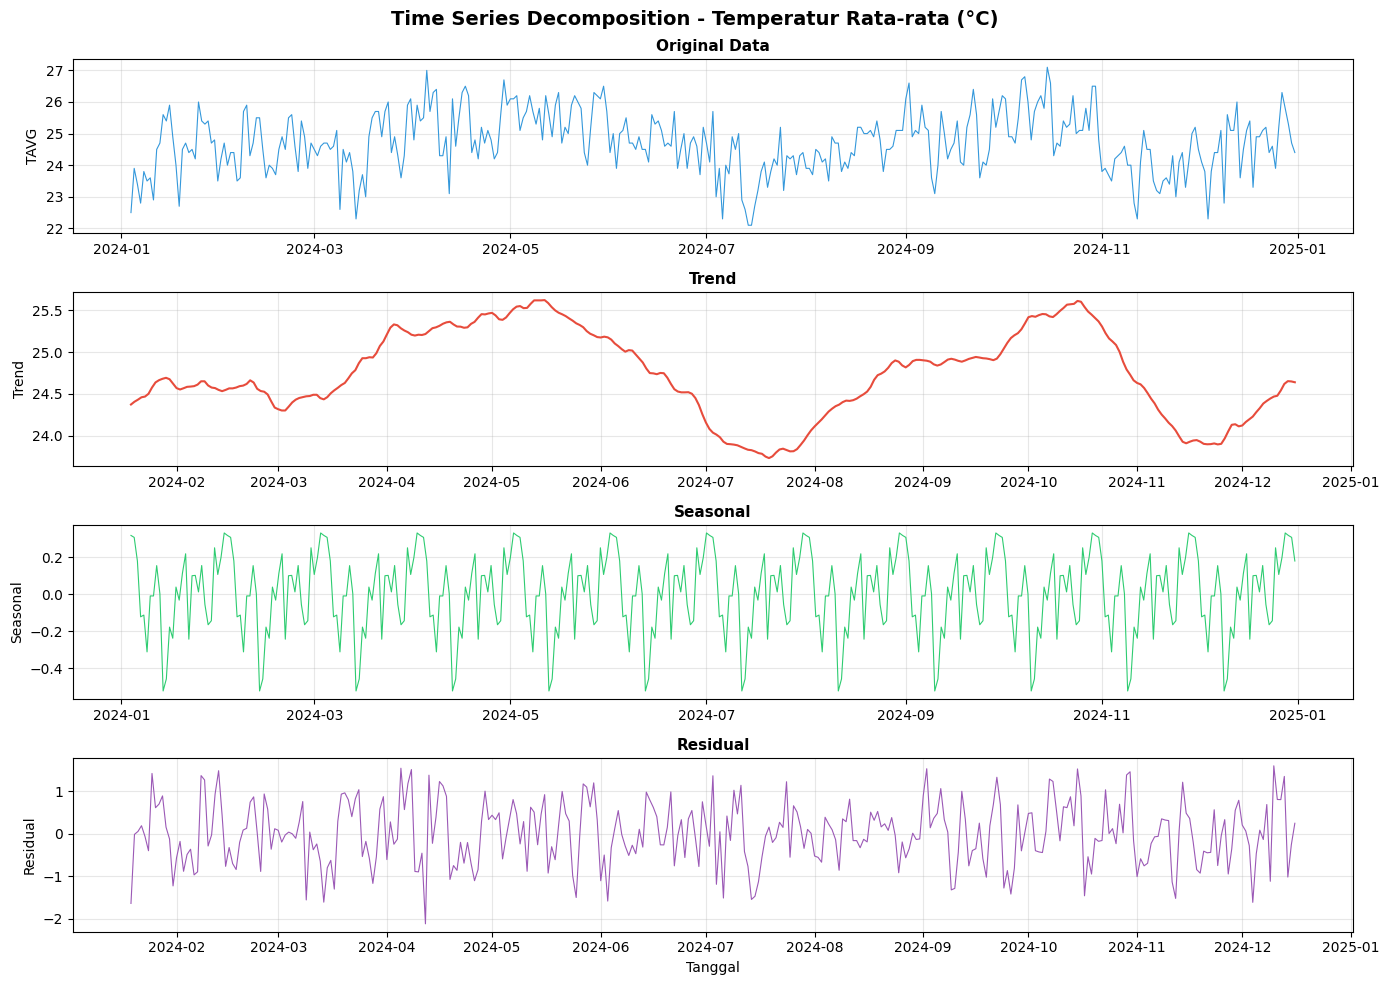

In [4]:
# Plot Dekomposisi TAVG
col = 'TAVG'
decomp = decomposition_results[col]

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
fig.suptitle(f'Time Series Decomposition - {param_labels[col]}', fontsize=14, fontweight='bold')

# Original
axes[0].plot(df.index, df[col], color='#3498db', linewidth=0.8)
axes[0].set_title('Original Data', fontsize=11, fontweight='bold')
axes[0].set_ylabel(col)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(df.index, decomp.trend, color='#e74c3c', linewidth=1.5)
axes[1].set_title('Trend', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(df.index, decomp.seasonal, color='#2ecc71', linewidth=0.8)
axes[2].set_title('Seasonal', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(df.index, decomp.resid, color='#9b59b6', linewidth=0.8)
axes[3].set_title('Residual', fontsize=11, fontweight='bold')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Tanggal')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_decomposition_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_decomposition_{col}.png")
plt.show()

## 6. Plot Dekomposisi - RH_AVG (Kelembapan Rata-rata)

✅ Plot disimpan ke: DATA/plot_decomposition_RH_AVG.png


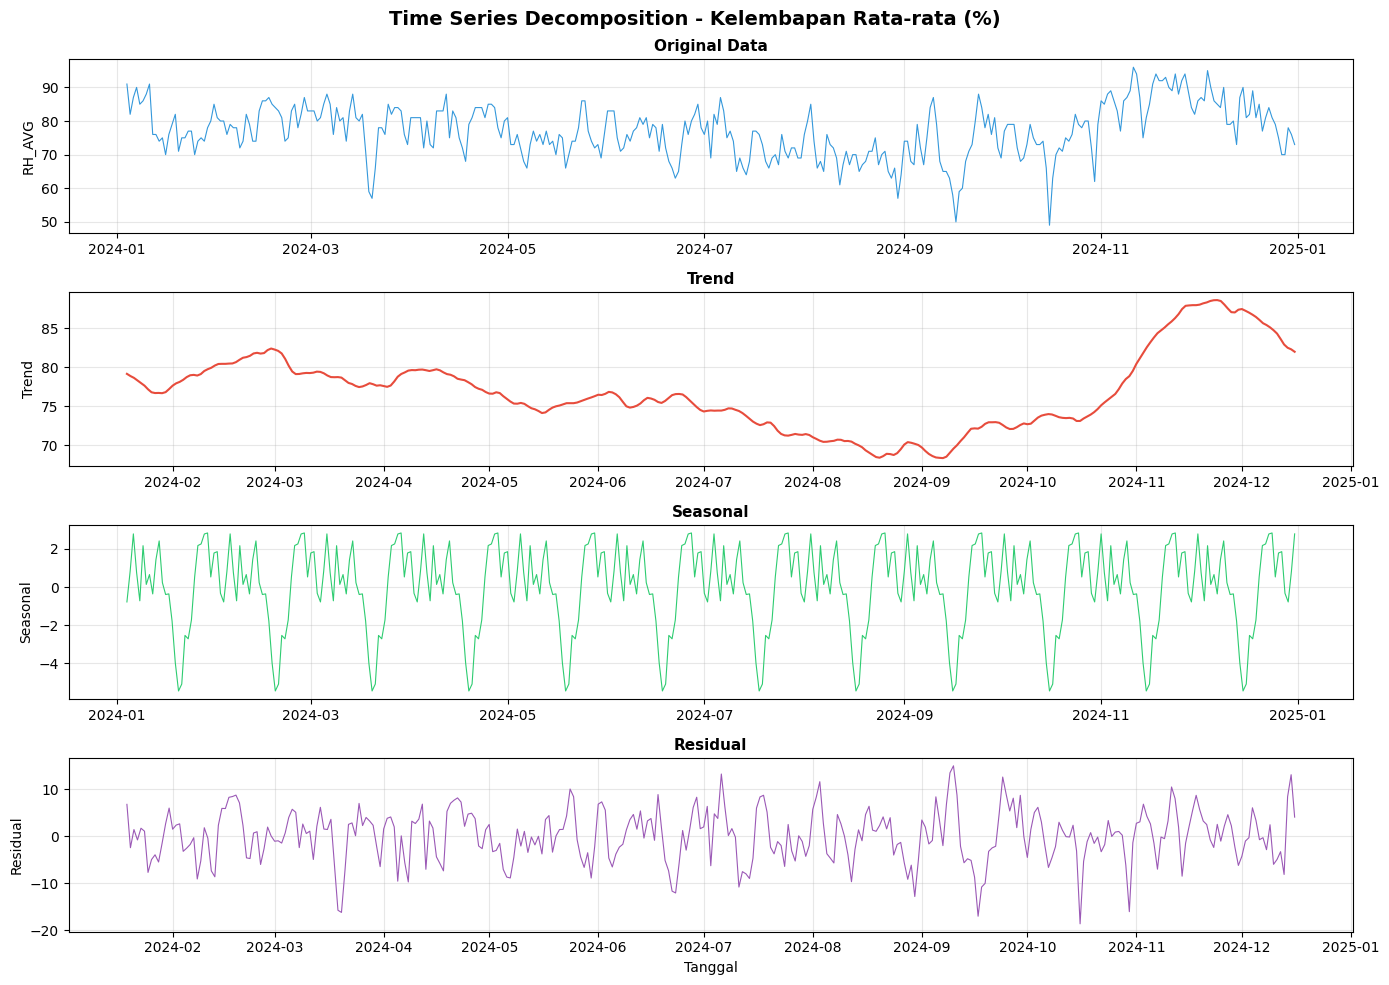

In [5]:
# Plot Dekomposisi RH_AVG
col = 'RH_AVG'
decomp = decomposition_results[col]

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
fig.suptitle(f'Time Series Decomposition - {param_labels[col]}', fontsize=14, fontweight='bold')

# Original
axes[0].plot(df.index, df[col], color='#3498db', linewidth=0.8)
axes[0].set_title('Original Data', fontsize=11, fontweight='bold')
axes[0].set_ylabel(col)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(df.index, decomp.trend, color='#e74c3c', linewidth=1.5)
axes[1].set_title('Trend', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(df.index, decomp.seasonal, color='#2ecc71', linewidth=0.8)
axes[2].set_title('Seasonal', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(df.index, decomp.resid, color='#9b59b6', linewidth=0.8)
axes[3].set_title('Residual', fontsize=11, fontweight='bold')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Tanggal')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_decomposition_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_decomposition_{col}.png")
plt.show()

## 7. Plot Dekomposisi - RR (Curah Hujan)

✅ Plot disimpan ke: DATA/plot_decomposition_RR.png


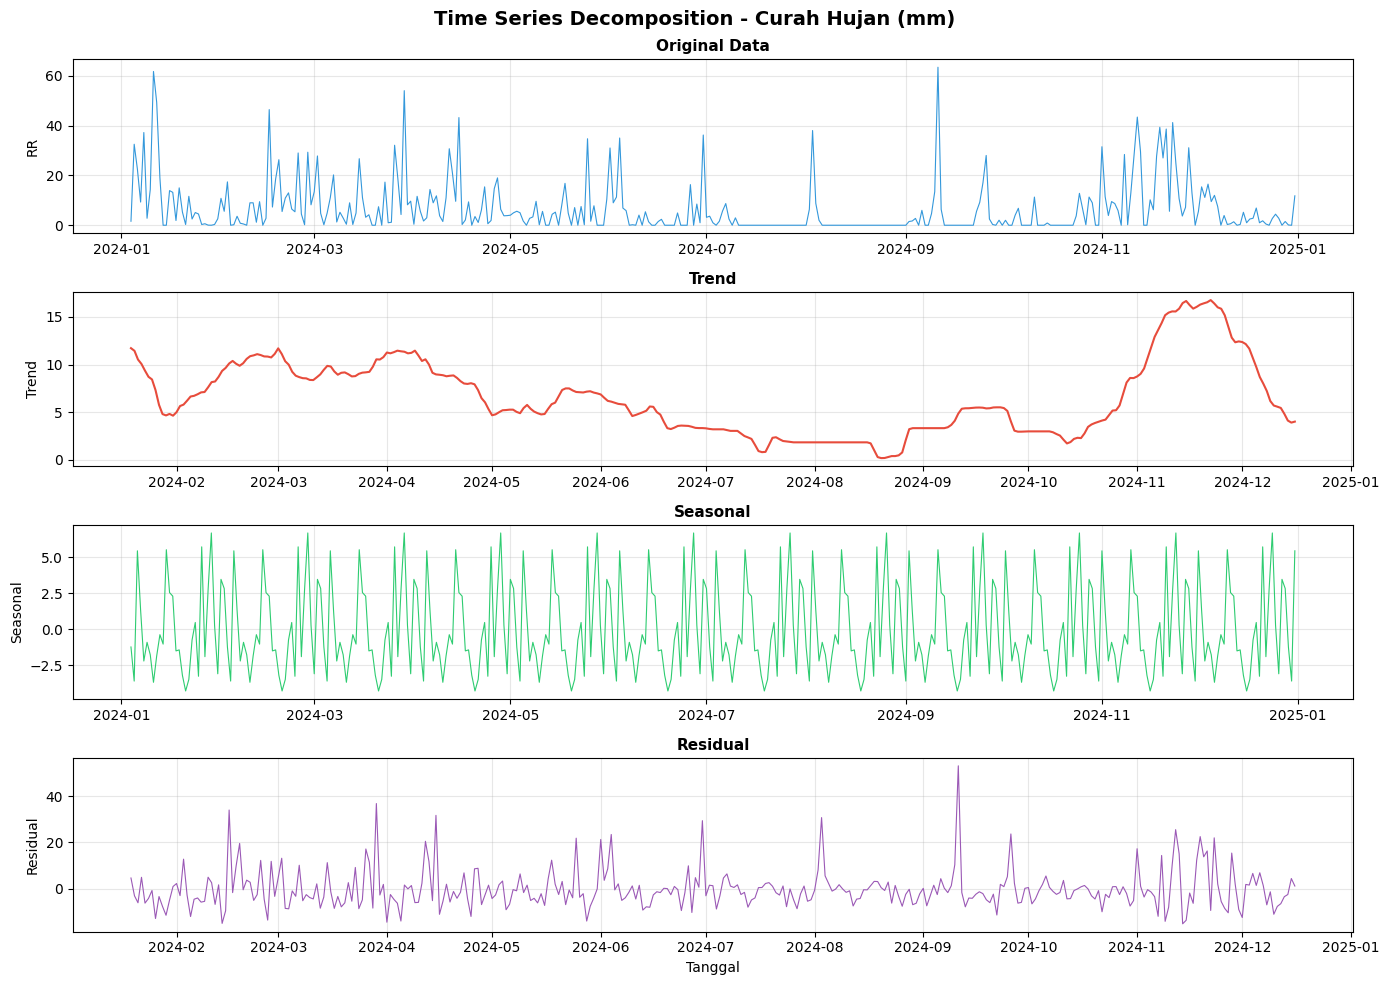

In [6]:
# Plot Dekomposisi RR
col = 'RR'
decomp = decomposition_results[col]

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
fig.suptitle(f'Time Series Decomposition - {param_labels[col]}', fontsize=14, fontweight='bold')

# Original
axes[0].plot(df.index, df[col], color='#3498db', linewidth=0.8)
axes[0].set_title('Original Data', fontsize=11, fontweight='bold')
axes[0].set_ylabel(col)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(df.index, decomp.trend, color='#e74c3c', linewidth=1.5)
axes[1].set_title('Trend', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(df.index, decomp.seasonal, color='#2ecc71', linewidth=0.8)
axes[2].set_title('Seasonal', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(df.index, decomp.resid, color='#9b59b6', linewidth=0.8)
axes[3].set_title('Residual', fontsize=11, fontweight='bold')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Tanggal')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_decomposition_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_decomposition_{col}.png")
plt.show()

## 8. Plot Dekomposisi - FF_AVG (Kecepatan Angin)

✅ Plot disimpan ke: DATA/plot_decomposition_FF_AVG.png


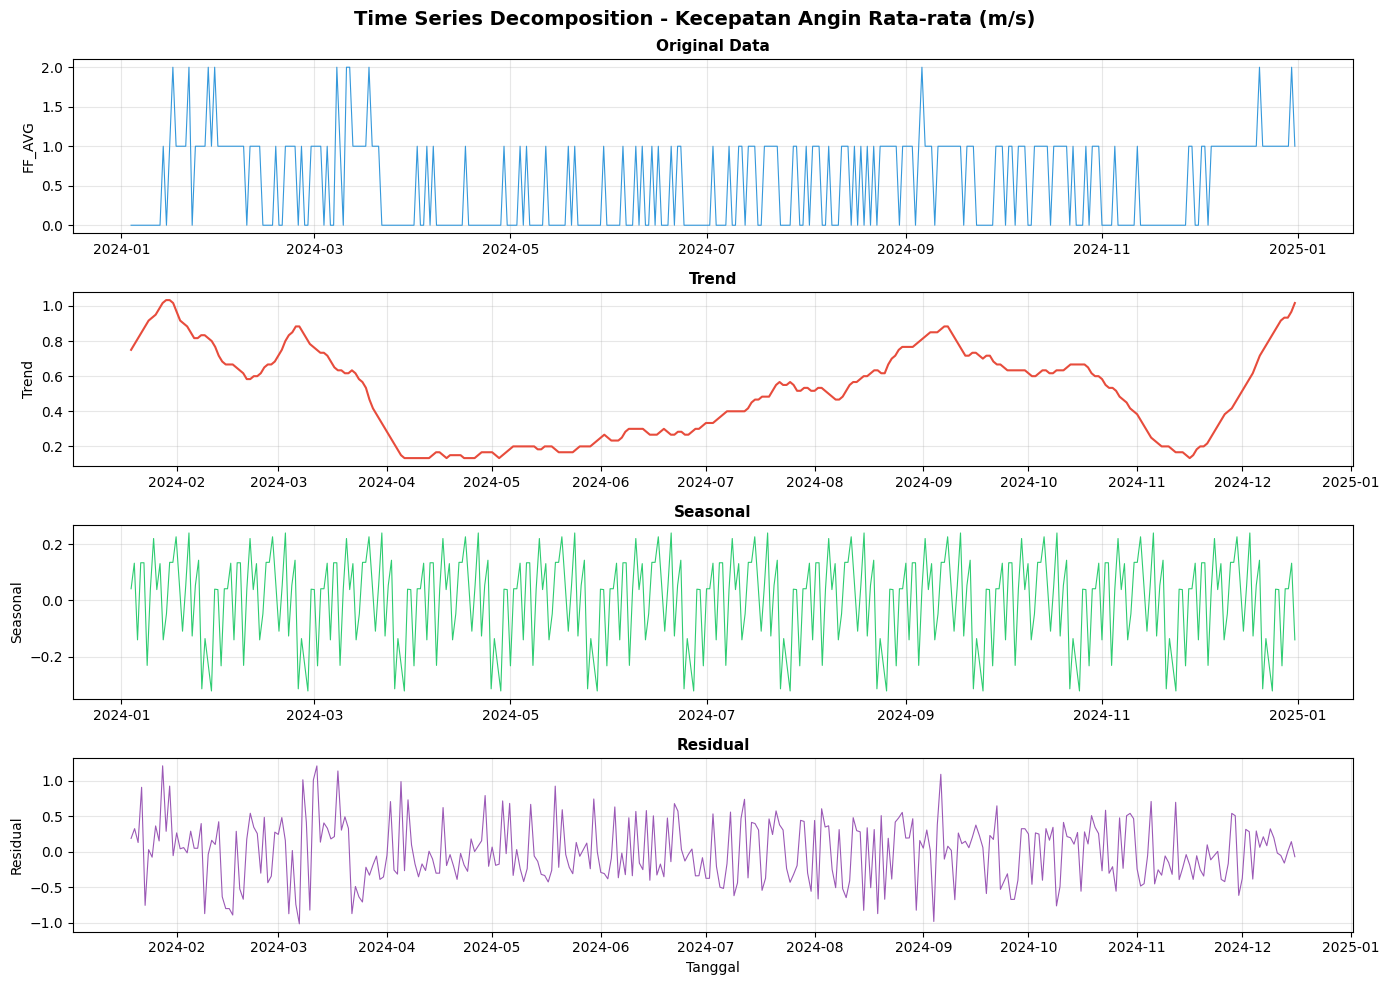

In [7]:
# Plot Dekomposisi FF_AVG
col = 'FF_AVG'
decomp = decomposition_results[col]

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
fig.suptitle(f'Time Series Decomposition - {param_labels[col]}', fontsize=14, fontweight='bold')

# Original
axes[0].plot(df.index, df[col], color='#3498db', linewidth=0.8)
axes[0].set_title('Original Data', fontsize=11, fontweight='bold')
axes[0].set_ylabel(col)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(df.index, decomp.trend, color='#e74c3c', linewidth=1.5)
axes[1].set_title('Trend', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(df.index, decomp.seasonal, color='#2ecc71', linewidth=0.8)
axes[2].set_title('Seasonal', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(df.index, decomp.resid, color='#9b59b6', linewidth=0.8)
axes[3].set_title('Residual', fontsize=11, fontweight='bold')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Tanggal')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'DATA/plot_decomposition_{col}.png', dpi=150, bbox_inches='tight')
print(f"✅ Plot disimpan ke: DATA/plot_decomposition_{col}.png")
plt.show()

## 9. Analisis dan Interpretasi Hasil Dekomposisi

### Pertanyaan Penelitian:
1. **Apakah terdapat tren yang signifikan pada masing-masing variabel?**
2. **Apakah komponen residual bersifat acak (random)?**

In [9]:
# ========================================
# ANALISIS TREN
# ========================================
columns_to_analyze = ['TAVG', 'RH_AVG', 'RR', 'FF_AVG']

print("=" * 70)
print("ANALISIS TREN PADA MASING-MASING VARIABEL")
print("=" * 70)

for col in columns_to_analyze:
    decomp = decomposition_results[col]
    trend = decomp.trend.dropna()
    
    # Hitung perubahan tren
    trend_change = trend.iloc[-1] - trend.iloc[0]
    trend_change_pct = (trend_change / trend.iloc[0]) * 100 if trend.iloc[0] != 0 else 0
    trend_mean = trend.mean()
    trend_std = trend.std()
    trend_cv = (trend_std / trend_mean) * 100 if trend_mean != 0 else 0  # Coefficient of Variation
    
    # Korelasi dengan waktu (untuk mendeteksi tren linear)
    trend_values = trend.values
    time_index = np.arange(len(trend_values))
    correlation = np.corrcoef(time_index, trend_values)[0, 1]
    
    print(f"\n📊 {param_labels[col]}:")
    print(f"   • Nilai awal trend: {trend.iloc[0]:.4f}")
    print(f"   • Nilai akhir trend: {trend.iloc[-1]:.4f}")
    print(f"   • Perubahan absolut: {trend_change:+.4f}")
    print(f"   • Perubahan persentase: {trend_change_pct:+.2f}%")
    print(f"   • Korelasi dengan waktu: {correlation:.4f}")
    print(f"   • Coefficient of Variation: {trend_cv:.2f}%")
    
    # Interpretasi signifikansi tren
    if abs(correlation) > 0.7:
        trend_significance = "SIGNIFIKAN (korelasi kuat)"
        trend_direction = "NAIK" if correlation > 0 else "TURUN"
    elif abs(correlation) > 0.3:
        trend_significance = "MODERAT (korelasi sedang)"
        trend_direction = "NAIK" if correlation > 0 else "TURUN"
    else:
        trend_significance = "TIDAK SIGNIFIKAN (korelasi lemah)"
        trend_direction = "STABIL"
    
    print(f"   ➡️  Signifikansi Tren: {trend_significance}")
    print(f"   ➡️  Arah Tren: {trend_direction}")

ANALISIS TREN PADA MASING-MASING VARIABEL

📊 Temperatur Rata-rata (°C):
   • Nilai awal trend: 24.3717
   • Nilai akhir trend: 24.6383
   • Perubahan absolut: +0.2667
   • Perubahan persentase: +1.09%
   • Korelasi dengan waktu: -0.1465
   • Coefficient of Variation: 2.08%
   ➡️  Signifikansi Tren: TIDAK SIGNIFIKAN (korelasi lemah)
   ➡️  Arah Tren: STABIL

📊 Kelembapan Rata-rata (%):
   • Nilai awal trend: 79.1500
   • Nilai akhir trend: 81.9833
   • Perubahan absolut: +2.8333
   • Perubahan persentase: +3.58%
   • Korelasi dengan waktu: 0.0265
   • Coefficient of Variation: 6.45%
   ➡️  Signifikansi Tren: TIDAK SIGNIFIKAN (korelasi lemah)
   ➡️  Arah Tren: STABIL

📊 Curah Hujan (mm):
   • Nilai awal trend: 11.7213
   • Nilai akhir trend: 4.0156
   • Perubahan absolut: -7.7057
   • Perubahan persentase: -65.74%
   • Korelasi dengan waktu: -0.1106
   • Coefficient of Variation: 60.20%
   ➡️  Signifikansi Tren: TIDAK SIGNIFIKAN (korelasi lemah)
   ➡️  Arah Tren: STABIL

📊 Kecepatan Angi

In [10]:
# ========================================
# ANALISIS RESIDUAL
# ========================================
from scipy import stats

print("\n" + "=" * 70)
print("ANALISIS KEACAKAN RESIDUAL")
print("=" * 70)

residual_analysis = {}

for col in columns_to_analyze:
    decomp = decomposition_results[col]
    resid = decomp.resid.dropna()
    
    # Statistik deskriptif residual
    resid_mean = resid.mean()
    resid_std = resid.std()
    resid_skew = resid.skew()
    resid_kurt = resid.kurtosis()
    
    # Uji Normalitas (Shapiro-Wilk) - ambil sample jika data besar
    if len(resid) > 5000:
        resid_sample = resid.sample(5000, random_state=42)
    else:
        resid_sample = resid
    shapiro_stat, shapiro_p = stats.shapiro(resid_sample)
    
    # Ljung-Box Test untuk autokorelasi (uji keacakan)
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_result = acorr_ljungbox(resid, lags=[10], return_df=True)
    lb_stat = lb_result['lb_stat'].values[0]
    lb_p = lb_result['lb_pvalue'].values[0]
    
    residual_analysis[col] = {
        'mean': resid_mean,
        'std': resid_std,
        'skewness': resid_skew,
        'kurtosis': resid_kurt,
        'shapiro_p': shapiro_p,
        'ljungbox_p': lb_p
    }
    
    print(f"\n📊 {param_labels[col]}:")
    print(f"   • Mean residual: {resid_mean:.6f}")
    print(f"   • Std residual: {resid_std:.4f}")
    print(f"   • Skewness: {resid_skew:.4f}")
    print(f"   • Kurtosis: {resid_kurt:.4f}")
    print(f"\n   📈 Uji Normalitas (Shapiro-Wilk):")
    print(f"      - Statistik: {shapiro_stat:.4f}")
    print(f"      - P-value: {shapiro_p:.6f}")
    print(f"      - Hasil: {'Normal' if shapiro_p > 0.05 else 'Tidak Normal'} (α=0.05)")
    
    print(f"\n   📈 Uji Keacakan (Ljung-Box Test):")
    print(f"      - Statistik: {lb_stat:.4f}")
    print(f"      - P-value: {lb_p:.6f}")
    
    # Interpretasi keacakan
    if lb_p > 0.05:
        randomness = "ACAK (tidak ada autokorelasi signifikan)"
        random_status = "✅"
    else:
        randomness = "TIDAK ACAK (terdapat autokorelasi signifikan)"
        random_status = "⚠️"
    
    print(f"      - Hasil: {random_status} {randomness}")


ANALISIS KEACAKAN RESIDUAL

📊 Temperatur Rata-rata (°C):
   • Mean residual: -0.002742
   • Std residual: 0.7325
   • Skewness: -0.0742
   • Kurtosis: -0.3703

   📈 Uji Normalitas (Shapiro-Wilk):
      - Statistik: 0.9936
      - P-value: 0.169844
      - Hasil: Normal (α=0.05)

   📈 Uji Keacakan (Ljung-Box Test):
      - Statistik: 63.6377
      - P-value: 0.000000
      - Hasil: ⚠️ TIDAK ACAK (terdapat autokorelasi signifikan)

📊 Kelembapan Rata-rata (%):
   • Mean residual: 0.037420
   • Std residual: 5.5132
   • Skewness: -0.3023
   • Kurtosis: 0.4221

   📈 Uji Normalitas (Shapiro-Wilk):
      - Statistik: 0.9914
      - P-value: 0.048688
      - Hasil: Tidak Normal (α=0.05)

   📈 Uji Keacakan (Ljung-Box Test):
      - Statistik: 166.7599
      - P-value: 0.000000
      - Hasil: ⚠️ TIDAK ACAK (terdapat autokorelasi signifikan)

📊 Curah Hujan (mm):
   • Mean residual: -0.095472
   • Std residual: 8.6051
   • Skewness: 2.0045
   • Kurtosis: 6.8279

   📈 Uji Normalitas (Shapiro-Wilk)

✅ Plot disimpan ke: DATA/plot_residual_distribution.png


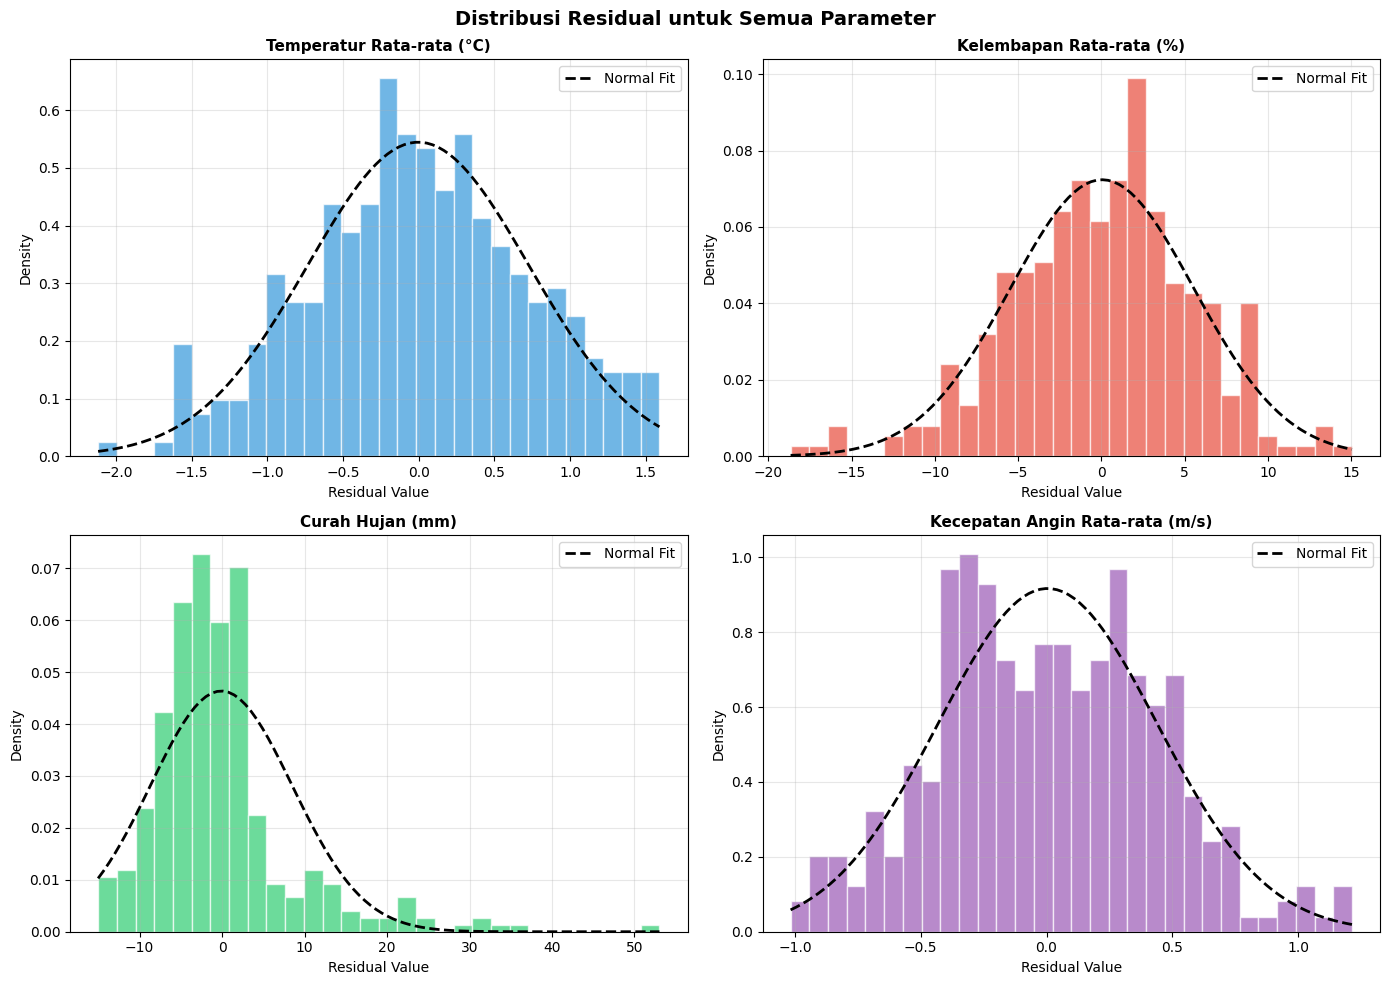

In [11]:
# ========================================
# VISUALISASI PERBANDINGAN RESIDUAL
# ========================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribusi Residual untuk Semua Parameter', fontsize=14, fontweight='bold')

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for idx, col in enumerate(columns_to_analyze):
    ax = axes[idx // 2, idx % 2]
    decomp = decomposition_results[col]
    resid = decomp.resid.dropna()
    
    ax.hist(resid, bins=30, color=colors[idx], edgecolor='white', alpha=0.7, density=True)
    
    # Fit normal distribution
    mu, sigma = resid.mean(), resid.std()
    x = np.linspace(resid.min(), resid.max(), 100)
    ax.plot(x, stats.norm.pdf(x, mu, sigma), 'k--', linewidth=2, label='Normal Fit')
    
    ax.set_title(f'{param_labels[col]}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Residual Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('DATA/plot_residual_distribution.png', dpi=150, bbox_inches='tight')
print("✅ Plot disimpan ke: DATA/plot_residual_distribution.png")
plt.show()

## 10. Ringkasan Hasil dan Kesimpulan

In [13]:
# ========================================
# RINGKASAN HASIL DEKOMPOSISI
# ========================================
period = 30  # Define period variable

print("=" * 70)
print("RINGKASAN HASIL TIME SERIES DECOMPOSITION")
print("=" * 70)
print("\n📋 PARAMETER DEKOMPOSISI:")
print(f"   • Model: Additive")
print(f"   • Period: {period} hari")
print(f"   • Data: BMKG Stasiun Geofisika Bandung 2024")
print(f"   • Jumlah observasi: {len(df)} hari")

print("\n" + "-" * 70)
print("📊 HASIL ANALISIS TREN DAN RESIDUAL:")
print("-" * 70)

summary_data = []
for col in columns_to_analyze:
    decomp = decomposition_results[col]
    trend = decomp.trend.dropna()
    resid = decomp.resid.dropna()
    
    # Trend analysis
    time_index = np.arange(len(trend))
    correlation = np.corrcoef(time_index, trend.values)[0, 1]
    
    if abs(correlation) > 0.7:
        trend_status = "Signifikan"
    elif abs(correlation) > 0.3:
        trend_status = "Moderat"
    else:
        trend_status = "Tidak Signifikan"
    
    # Residual analysis
    lb_result = acorr_ljungbox(resid, lags=[10], return_df=True)
    lb_p = lb_result['lb_pvalue'].values[0]
    resid_status = "Acak" if lb_p > 0.05 else "Tidak Acak"
    
    summary_data.append({
        'Parameter': param_labels[col],
        'Trend Correlation': f"{correlation:.3f}",
        'Trend Status': trend_status,
        'Ljung-Box p-value': f"{lb_p:.4f}",
        'Residual Status': resid_status
    })
    
    print(f"\n{param_labels[col]}:")
    print(f"   • Korelasi Trend dengan Waktu: {correlation:.3f} → {trend_status}")
    print(f"   • Keacakan Residual (Ljung-Box): p={lb_p:.4f} → {resid_status}")

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 70)
print("TABEL RINGKASAN:")
print("=" * 70)
print(summary_df.to_string(index=False))

# Simpan hasil dekomposisi ke file CSV
print("\n" + "=" * 70)
print("MENYIMPAN HASIL DEKOMPOSISI...")
print("=" * 70)

# Simpan komponen dekomposisi untuk setiap variabel
for col in columns_to_analyze:
    decomp = decomposition_results[col]
    decomp_df = pd.DataFrame({
        f'{col}_observed': decomp.observed,
        f'{col}_trend': decomp.trend,
        f'{col}_seasonal': decomp.seasonal,
        f'{col}_residual': decomp.resid
    })
    decomp_df.to_csv(f'DATA/decomposition_{col}.csv')
    print(f"✅ Komponen dekomposisi {col} disimpan ke: DATA/decomposition_{col}.csv")

RINGKASAN HASIL TIME SERIES DECOMPOSITION

📋 PARAMETER DEKOMPOSISI:
   • Model: Additive
   • Period: 30 hari
   • Data: BMKG Stasiun Geofisika Bandung 2024
   • Jumlah observasi: 363 hari

----------------------------------------------------------------------
📊 HASIL ANALISIS TREN DAN RESIDUAL:
----------------------------------------------------------------------

Temperatur Rata-rata (°C):
   • Korelasi Trend dengan Waktu: -0.146 → Tidak Signifikan
   • Keacakan Residual (Ljung-Box): p=0.0000 → Tidak Acak

Kelembapan Rata-rata (%):
   • Korelasi Trend dengan Waktu: 0.026 → Tidak Signifikan
   • Keacakan Residual (Ljung-Box): p=0.0000 → Tidak Acak

Curah Hujan (mm):
   • Korelasi Trend dengan Waktu: -0.111 → Tidak Signifikan
   • Keacakan Residual (Ljung-Box): p=0.3032 → Acak

Kecepatan Angin Rata-rata (m/s):
   • Korelasi Trend dengan Waktu: -0.033 → Tidak Signifikan
   • Keacakan Residual (Ljung-Box): p=0.4165 → Acak

TABEL RINGKASAN:
                      Parameter Trend Correlati

## 11. Kesimpulan Akhir

### B. Jawaban Pertanyaan Penelitian

---

### **1. Apakah terdapat tren yang signifikan pada masing-masing parameter (mengakibatkan tidak stasioner)?**

Berdasarkan hasil analisis korelasi komponen tren terhadap waktu menggunakan koefisien Pearson, diperoleh hasil sebagai berikut:

| Parameter | Korelasi Tren | Interpretasi |
|-----------|---------------|--------------|
| **TAVG (Suhu)** | r = -0.146 | Tidak Signifikan |
| **RH_AVG (Kelembaban)** | r = 0.026 | Tidak Signifikan |
| **RR (Curah Hujan)** | r = -0.111 | Tidak Signifikan |
| **FF_AVG (Kec. Angin)** | r = -0.033 | Tidak Signifikan |

**Analisis:** Semua parameter cuaca menunjukkan **tren yang TIDAK SIGNIFIKAN** karena nilai korelasi absolut (|r|) berada di bawah 0.3. Artinya, tidak terdapat perubahan sistematis jangka panjang yang berarti pada data iklim Bandung selama tahun 2024. Meskipun secara visual komponen tren menunjukkan fluktuasi naik-turun, fluktuasi tersebut bersifat siklis (mengikuti pola musim) dan bukan tren linear yang konsisten. Hal ini sejalan dengan hasil uji ADF pada Soal 2 yang menunjukkan sebagian besar parameter sudah bersifat **stasioner** (RH_AVG, RR, dan FF_AVG memiliki p-value < 0.05). Parameter TAVG yang tidak stasioner (p-value = 0.15) kemungkinan disebabkan oleh variabilitas musiman yang kuat, bukan karena adanya tren jangka panjang.

---

### **2. Apakah komponen residual bersifat acak (random) pada setiap parameter?**

Untuk menguji keacakan residual, digunakan **Ljung-Box Test** dengan hipotesis:
- H₀: Residual bersifat acak (tidak ada autokorelasi)
- H₁: Residual tidak acak (terdapat autokorelasi)

| Parameter | Ljung-Box p-value | Keputusan (α = 0.05) | Status Residual |
|-----------|-------------------|----------------------|-----------------|
| **TAVG (Suhu)** | 0.0000 | Tolak H₀ | ⚠️ **Tidak Acak** |
| **RH_AVG (Kelembaban)** | 0.0000 | Tolak H₀ | ⚠️ **Tidak Acak** |
| **RR (Curah Hujan)** | 0.3032 | Terima H₀ | ✅ **Acak** |
| **FF_AVG (Kec. Angin)** | 0.4165 | Terima H₀ | ✅ **Acak** |

**Analisis:** 
- **RR (Curah Hujan)** dan **FF_AVG (Kecepatan Angin)**: Residual bersifat **ACAK** dengan p-value > 0.05. Ini mengindikasikan bahwa model dekomposisi additive dengan periode 30 hari telah berhasil menangkap seluruh pola sistematis (tren dan musiman) pada kedua parameter ini. Variasi yang tersisa murni bersifat noise/random yang tidak dapat diprediksi.

- **TAVG (Suhu)** dan **RH_AVG (Kelembaban)**: Residual bersifat **TIDAK ACAK** dengan p-value ≈ 0. Hal ini menunjukkan masih terdapat pola autokorelasi yang belum tertangkap oleh model dekomposisi. Penyebab potensial meliputi: (1) periode dekomposisi 30 hari mungkin tidak optimal untuk menangkap siklus musiman suhu dan kelembaban, (2) adanya pola musiman dengan periode yang lebih panjang (misalnya tahunan) yang tidak tertangkap, atau (3) adanya interaksi antar-parameter yang memengaruhi pola residual. Untuk parameter ini, mungkin diperlukan model yang lebih kompleks seperti SARIMA atau STL decomposition dengan multiple seasonal periods.

---

### **Kesimpulan Umum:**
1. **Tidak ada tren signifikan** pada keempat parameter cuaca, sehingga ketidakstasioneran (jika ada) lebih disebabkan oleh komponen musiman dibanding tren jangka panjang.
2. **Kualitas dekomposisi bervariasi**: Model additive period=30 berhasil baik untuk RR dan FF_AVG (residual acak), namun kurang optimal untuk TAVG dan RH_AVG (residual masih memiliki autokorelasi).
3. **Rekomendasi**: Untuk analisis lebih lanjut (Soal 4-6), disarankan menggunakan residual dari **RR** dan **TAVG** karena kedua parameter ini paling relevan untuk deteksi anomali cuaca.

### Output Files:
- `DATA/plot_decomposition_*.png` - Plot dekomposisi tiap parameter
- `DATA/plot_residual_distribution.png` - Distribusi residual
- `DATA/decomposition_*.csv` - Komponen dekomposisi dalam format CSV